<a href="https://colab.research.google.com/github/yuna1998/datamining/blob/main/data_mining_shrinkage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
 ##regulaization
 library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-1



In [2]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’




In [4]:
library(MASS)

In [5]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [6]:
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [8]:
x  = model.matrix(medv~., data = Boston)[,-1]

In [10]:
x[1:10,]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [11]:
y = Boston$medv

In [12]:
set.seed(1)

In [13]:
n = dim(Boston)[1]

In [14]:
n

[1] 506

In [15]:
set.seed(1)
train = sample(n, n/2)
train

[1] 505 324 167 129 418 471 299 270 466 187 307 481  85 277 362 438 330 263
 [19] 329  79 213  37 105 217 366 165 290 492 382  89 428 463 289 340 419 326
 [37] 490  42 422 111 404 412  20  44 377 343  70 121  40 172  25 375 248 198
 [55] 378  39 435 298 390 280 160  14 130  45 402  22 206 230 193 371 104 501
 [73] 255 450 436 103 331  13 296 483 176 345 279 110  84 359  29 141 252 406
 [91] 221 465 108 304  33 443 149 287 102 145 488 461 339 118 346 413 107  64
[109] 224 431 316  51 416 480 138 503 500 282 143 285 170  48 204 295  24 181
[127] 214 476 225 498 442 163  43   1 420  78 433 284 116 233 293  61  86 327
[145] 423 355 496 300  49 396 242 246 305 306 247 239 219 135 467 464 395  53
[163] 444 401  65 421 484 124  77 218  98 194  19 273  31 174 237  75  16 458
[181] 265 353  92 122 152 392 207 249 446 229 140 126 445 368 328 271 344 342
[199] 333 212 127 133  41  36 297 399 391 360 117 408  50 286 254  72 437 168
[217] 313 113 234 459  73  27 405  15  62 132  35 338 473 185 153 332 485 434
[235] 231  28 389 148 325  60 275  93 202 336 241 415 281 449 364 427 478 274
[253] 414

In [16]:
x.train = x[train,]
x.test = x[-train,]
y.train = y[train]
y.test = y[-train]

In [17]:
f=glmnet(x.train, y.train, alpha = 0, lambda = 0)

In [18]:
f


Call:  glmnet(x = x.train, y = y.train, alpha = 0, lambda = 0) 

  Df  %Dev Lambda
1 13 76.83      0

In [19]:
coef(f)

14 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)  34.652506843
crim         -0.091916107
zn            0.029899187
indus         0.032137218
chas          2.309590315
nox         -13.574814598
rm            4.105080985
age          -0.003547556
dis          -1.263815040
rad           0.378411988
tax          -0.019072924
ptratio      -0.980232220
black         0.006801121
lstat        -0.486443115

In [20]:
f1=glmnet(x.train, y.train, alpha = 0, lambda = 10^5)

In [21]:
coef(f1)

14 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)  2.178924e+01
crim        -3.638275e-05
zn           1.298292e-05
indus       -5.443930e-05
chas         5.950008e-04
nox         -3.064175e-03
rm           7.893172e-04
age         -1.158678e-05
dis          1.083753e-04
rad         -3.459452e-05
tax         -2.231796e-06
ptratio     -1.943606e-04
black        2.882846e-06
lstat       -8.188645e-05

In [22]:
pred = predict(f, newx = x.test)
mean((y.test-pred)^2)

[1] 26.85393

In [24]:
pred = predict(f1, newx = x.test)
mean((y.test-pred)^2)

[1] 93.04267

In [25]:
lam = exp(seq(10,-2,length=100))

In [29]:
ridge.mod = glmnet(x.train, y.train, alpha = 0, lambad = lam)

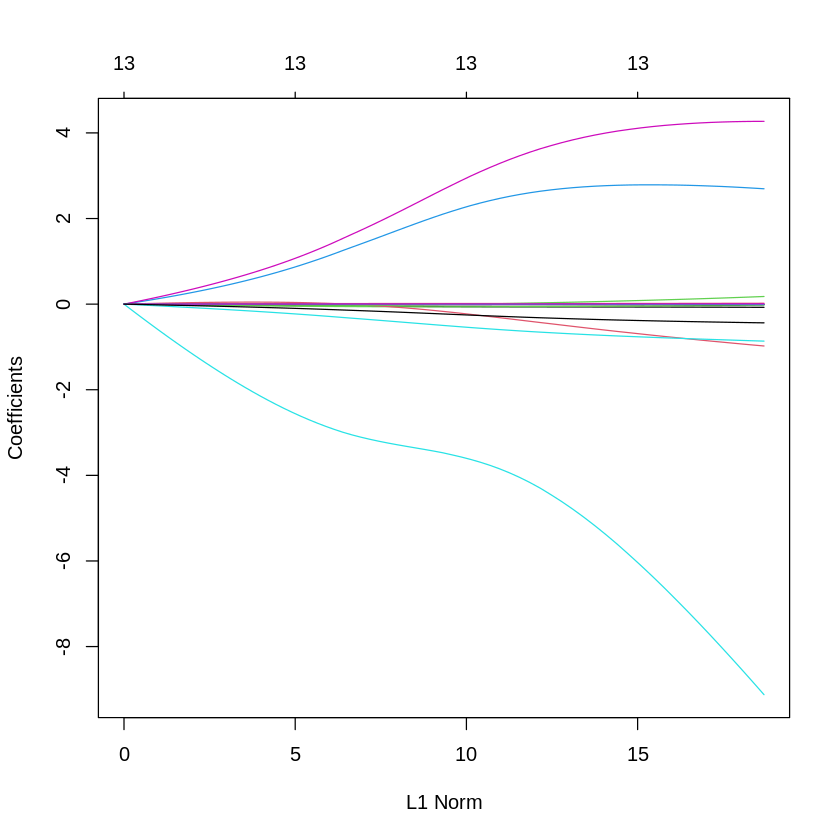

In [30]:
plot(ridge.mod)

In [31]:
predict(ridge.mod, type="coefficients", s= 10)

14 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept) 20.993731381
crim        -0.058433639
zn           0.014969415
indus       -0.062065905
chas         2.149840201
nox         -3.506652217
rm           2.749361826
age         -0.012834792
dis         -0.184344465
rad         -0.007125506
tax         -0.003143022
ptratio     -0.508506968
black        0.004879296
lstat       -0.235756719

In [32]:
set.seed(1)

In [41]:
cv.out0 = cv.glmnet(x.train, y.train, alpha = 0, lambda = lam, keep = T)

In [42]:
cv.out0


Call:  cv.glmnet(x = x.train, y = y.train, lambda = lam, keep = T, alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure   SE Nonzero
min  0.135   100   20.39 2.89      13
1se  3.571    73   23.17 3.94      13

In [43]:
cv.out0$foldid

[1]  7  8  5  4  9  9  9  2  7  4  2  3  6  4  1  9  9  5  8  1  8  8  1  3  5
 [26]  2  6  1  1  6  1  6  3  7  6  5  3  8  1  3  5  3  1  8  8  5  3  7  2 10
 [51]  2  3  4  8  8  7  9 10  1  5  9  1  6 10 10  9  2  8  3 10  1  5  4  1  3
 [76]  4  9 10  4  3  7  5  8  7  4  6  5  3  6  4  1  3  7  7  4  9  9  3  6  2
[101]  6  2  8  4  9  1  2  1  8  6  5  9  1  9  5  7  8  1  1  9  8  8  3  4  4
[126]  6  4  2  5  7  7  2 10  5  1 10  6  1  8  2  5 10 10  4  5 10  7  5  1 10
[151]  9  8  3  6  9  2  2  6  8  3 10  9  2  9  2 10  8  4  3 10  2  8  7  5  4
[176]  6  1  5  1  9  2  4  7  2  7  1 10  6  6  7  8  7 10  7  9  6  2 10  5  5
[201]  3  2  5  6 10 10  8  8  4  3  3  5  1  6  5  6  7  8  3 10  2  6 10 10  4
[226]  4  4  7  2  7  9  6  3  3  3  7  9  2  2  5  9  9  2  6  3  4  4  7 10  7
[251] 10  4  1

In [36]:
best.lam = cv.out0$lambda.min

In [37]:
pred0 = predict(cv.out0, s = best.lam, newx = x.test)

In [38]:
mean((y.test-pred0)^2)

[1] 26.76361

In [39]:
f = glmnet(x.train, y.train, alpha = 0, lambda = 0)
f
coef(f)
pred = predict(f, newx = x.test)
mean((y.test-pred)^2)


Call:  glmnet(x = x.train, y = y.train, alpha = 0, lambda = 0) 

  Df  %Dev Lambda
1 13 76.83      0

14 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)  34.652506843
crim         -0.091916107
zn            0.029899187
indus         0.032137218
chas          2.309590315
nox         -13.574814598
rm            4.105080985
age          -0.003547556
dis          -1.263815040
rad           0.378411988
tax          -0.019072924
ptratio      -0.980232220
black         0.006801121
lstat        -0.486443115

[1] 26.85393

In [40]:
## LASSO cv

In [45]:
set.seed(1)
cv.out1 = cv.glmnet(x.train, y.train, alpha = 1, lambda = lam, keep=T)
cv.out1
cv.out1$foldid
best.lam1 = cv.out1$lambda.min
pred1 = predict(cv.out1, s= best.lam1, newx = x.test)
mean((y.test-pred1)^2)


Call:  cv.glmnet(x = x.train, y = y.train, lambda = lam, keep = T, alpha = 1) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min 0.1353   100   22.18 3.257      11
1se 0.5796    88   25.22 3.539       6

[1]  9  8  7  9  2  5  3  4 10  7  1  5  5  1  6  2  4  7  3  9  3  7  5  7 10
 [26]  5  4  9  6  9  2  7  3  4  3 10  7  2  6  1  8  6 10  4  1  7  8  9 10  3
 [51]  5  9  8  2  9  9  6  4  4 10  6 10  5  6  2  5  4  2  6  4  3  5  3  5  6
 [76]  4  3  9 10  3  9  1 10  2  8  8  1  1  9  1  2  5  5  8  3  8 10  8  7  4
[101]  4 10  3  7  8 10  7  6  3  3 10  9  5 10  9  7  7  1  4  8  5  8  6  2  1
[126]  6  3  7  6  9  1  1  4  1  5  9  1  2  4  6  8 10  4  1  6  1  4 10  3  6
[151]  9 10  2  3  5  2  7  8  6  9  7  1  8  4  5  8  4 10  4 10  9  2  5 10  4
[176]  2  2  2  2  3  1  5  1  6  2  3  5  1  6  7  8  6  7  5  5 10  6  4  9  7
[201]  8  4  1  9  8  1 10  9  3  3 10  2 10  5  6  8  9  2  3  7  2  3  6  7  3
[226]  4  3  2  1  8  7  7  9  7 10  3  7  5  2  9  6  1  4  8  2  6  2  5  8  8
[251]  1  8  1

[1] 27.69541

In [46]:
predict(cv.out1, type = "coefficients", s = best.lam1)

14 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept) 24.680650123
crim        -0.046527827
zn           0.012032030
indus        .          
chas         2.368067589
nox         -7.515765477
rm           4.363902109
age          .          
dis         -0.803559496
rad          0.140649110
tax         -0.009057747
ptratio     -0.860359537
black        0.005160003
lstat       -0.492890296

In [48]:
##indus, age  : zero matrix

In [49]:
predict(cv.out1, type = "coefficients", s = best.lam1)[1:14, ]

(Intercept)         crim           zn        indus         chas          nox 
24.680650123 -0.046527827  0.012032030  0.000000000  2.368067589 -7.515765477 
          rm          age          dis          rad          tax      ptratio 
 4.363902109  0.000000000 -0.803559496  0.140649110 -0.009057747 -0.860359537 
       black        lstat 
 0.005160003 -0.492890296

In [50]:
min(cv.out1$cvm)

[1] 22.17966

In [51]:
which.min(cv.out1$cvm)

[1] 100

In [53]:
cv.out1$lambda[which.min(cv.out1$cvm)]

[1] 0.1353353

In [55]:
set.seed(1)
cv.out2 = cv.glmnet(x.train, y.train, alpha = 0.5, lambda = lam, keep=T)
cv.out2
cv.out2$foldid
best.lam2 = cv.out2$lambda.min
pred2 = predict(cv.out2, s= best.lam2, newx = x.test)
mean((y.test-pred2)^2)
predict(cv.out2, type = "coefficients", s = best.lam2)[1:14, ]
min(cv.out2$cvm)
cv.out2$lambda[which.min(cv.out2$cvm)]


Call:  cv.glmnet(x = x.train, y = y.train, lambda = lam, keep = T, alpha = 0.5) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min 0.1353   100   21.43 3.106      12
1se 0.7386    86   24.38 3.596       8

[1]  9  8  7  9  2  5  3  4 10  7  1  5  5  1  6  2  4  7  3  9  3  7  5  7 10
 [26]  5  4  9  6  9  2  7  3  4  3 10  7  2  6  1  8  6 10  4  1  7  8  9 10  3
 [51]  5  9  8  2  9  9  6  4  4 10  6 10  5  6  2  5  4  2  6  4  3  5  3  5  6
 [76]  4  3  9 10  3  9  1 10  2  8  8  1  1  9  1  2  5  5  8  3  8 10  8  7  4
[101]  4 10  3  7  8 10  7  6  3  3 10  9  5 10  9  7  7  1  4  8  5  8  6  2  1
[126]  6  3  7  6  9  1  1  4  1  5  9  1  2  4  6  8 10  4  1  6  1  4 10  3  6
[151]  9 10  2  3  5  2  7  8  6  9  7  1  8  4  5  8  4 10  4 10  9  2  5 10  4
[176]  2  2  2  2  3  1  5  1  6  2  3  5  1  6  7  8  6  7  5  5 10  6  4  9  7
[201]  8  4  1  9  8  1 10  9  3  3 10  2 10  5  6  8  9  2  3  7  2  3  6  7  3
[226]  4  3  2  1  8  7  7  9  7 10  3  7  5  2  9  6  1  4  8  2  6  2  5  8  8
[251]  1  8  1

[1] 27.08148

(Intercept)          crim            zn         indus          chas 
 28.688941197  -0.067485615   0.019755552   0.000000000   2.394569139 
          nox            rm           age           dis           rad 
-10.007049230   4.247022710  -0.001103146  -1.003439211   0.231846333 
          tax       ptratio         black         lstat 
 -0.012585417  -0.907632975   0.005949041  -0.484809947

[1] 21.4293

[1] 0.1353353

In [58]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [59]:
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [60]:
##caret package for tuning both alpha and lambda
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [62]:
install.packages("lattice")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [63]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [64]:
library(caret)

In [67]:
install.packages("doParallel")
library(doParallel)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [66]:
install.packages("foreach")
install.packages("iterators")
install.packages("parallel")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘parallel’ is a base package, and should not be updated”


In [68]:
nc = detectCores()

In [69]:
registerDoParallel(nc)

In [70]:
myControl = trainControl(method = "cv", number = 10, allowParallel = T)

In [71]:
fit = train(x.train, y.train, method = "glmnet", trControl = myControl)

In [72]:
fit

glmnet 

253 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 228, 227, 228, 228, 228, 227, ... 
Resampling results across tuning parameters:

  alpha  lambda      RMSE      Rsquared   MAE     
  0.10   0.01309253  4.540621  0.7654802  3.176100
  0.10   0.13092533  4.541584  0.7663408  3.166166
  0.10   1.30925330  4.719341  0.7537587  3.349232
  0.55   0.01309253  4.540438  0.7655434  3.175694
  0.55   0.13092533  4.571088  0.7645455  3.191543
  0.55   1.30925330  4.954652  0.7346034  3.556195
  1.00   0.01309253  4.540576  0.7656311  3.173851
  1.00   0.13092533  4.635511  0.7593794  3.258292
  1.00   1.30925330  5.123820  0.7283405  3.688094

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were alpha = 0.55 and lambda = 0.01309253.

In [75]:
myControl = trainControl(method = "cv", number = 10, allowParallel = T)
set.seed(1)
fit = train(x.train, y.train, method = "glmnet", trControl = myControl, tuneLength = 5)
fit

glmnet 

253 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 228, 228, 229, 225, 228, 229, ... 
Resampling results across tuning parameters:

  alpha  lambda       RMSE      Rsquared   MAE     
  0.100  0.006077014  4.596732  0.7320047  3.257398
  0.100  0.028207002  4.593909  0.7323005  3.254293
  0.100  0.130925312  4.575520  0.7343205  3.230858
  0.100  0.607701493  4.593214  0.7350250  3.269146
  0.100  2.820700591  4.838969  0.7238132  3.511083
  0.325  0.006077014  4.596621  0.7320540  3.257506
  0.325  0.028207002  4.590293  0.7327063  3.249993
  0.325  0.130925312  4.572720  0.7350885  3.225686
  0.325  0.607701493  4.703947  0.7262755  3.404682
  0.325  2.820700591  5.052812  0.7178303  3.652661
  0.550  0.006077014  4.596416  0.7320209  3.257499
  0.550  0.028207002  4.587708  0.7330323  3.246330
  0.550  0.130925312  4.579123  0.7350748  3.230251
  0.550  0.607701493  4.746361  0.7232433  3.448546
  0.550  2.820700591 

In [77]:
pred = predict.train(fit, newx = x.test)
mean((y.test-pred)^2)

[1] 142.8672

In [79]:
myGrid = expand.grid(alpha = seq(0,1,by = 0.1), lambda = lam)
set.seed(1)
fit = train(x.train, y.train, method = "glmnet", trControl = myControl, tuneGrid = myGrid)
fit

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


glmnet 

253 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 228, 228, 229, 225, 228, 229, ... 
Resampling results across tuning parameters:

  alpha  lambda        RMSE      Rsquared   MAE     
  0.0    1.353353e-01  4.562335  0.7368709  3.239467
  0.0    1.527752e-01  4.562335  0.7368709  3.239467
  0.0    1.724624e-01  4.562335  0.7368709  3.239467
  0.0    1.946867e-01  4.562335  0.7368709  3.239467
  0.0    2.197749e-01  4.562335  0.7368709  3.239467
  0.0    2.480960e-01  4.562335  0.7368709  3.239467
  0.0    2.800668e-01  4.562335  0.7368709  3.239467
  0.0    3.161574e-01  4.562335  0.7368709  3.239467
  0.0    3.568988e-01  4.562335  0.7368709  3.239467
  0.0    4.028903e-01  4.562335  0.7368709  3.239467
  0.0    4.548085e-01  4.562335  0.7368709  3.239467
  0.0    5.134171e-01  4.562335  0.7368709  3.239467
  0.0    5.795783e-01  4.562335  0.7368709  3.239467
  0.0    6.542653e-01  4.563335  0.7369367  3.240104
  0.0 

In [80]:
pred = predict.train(fit, newdata = x.test)
mean((y.test-pred)^2)

[1] 27.19152

In [83]:
myGrid = expand.grid(alpha = seq(0,1,by=0.2), lambda = exp(seq(10,-2, length = 10)))

In [85]:
set.seed(1)
fit = train(x.train, y.train, method = "glmnet", trControl = myControl, tunreGrid = myGrid)
fit

glmnet 

253 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 228, 228, 229, 225, 228, 229, ... 
Resampling results across tuning parameters:

  alpha  lambda      RMSE      Rsquared   MAE     
  0.10   0.01309253  4.596732  0.7320047  3.257398
  0.10   0.13092533  4.575520  0.7343205  3.230858
  0.10   1.30925330  4.680772  0.7302572  3.378485
  0.55   0.01309253  4.594438  0.7322887  3.255153
  0.55   0.13092533  4.579123  0.7350748  3.230251
  0.55   1.30925330  4.890200  0.7168642  3.551565
  1.00   0.01309253  4.591760  0.7326029  3.251771
  1.00   0.13092533  4.626816  0.7313639  3.289978
  1.00   1.30925330  5.093136  0.7049635  3.688943

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were alpha = 0.1 and lambda = 0.1309253.

In [86]:
##regularization for classification(logistic regression)

In [93]:
hdata = read.csv("Heart.csv", stringsAsFactors = T)

In [94]:
head(hdata)

,X,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>
1,1,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
2,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
3,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
4,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
5,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No
6,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0,normal,No


In [95]:
hdata$X = NULL

In [96]:
str(hdata)

'data.frame':	303 obs. of  14 variables:
 $ Age      : int  63 67 67 37 41 56 62 57 63 53 ...
 $ Sex      : int  1 1 1 1 0 1 0 0 1 1 ...
 $ ChestPain: Factor w/ 4 levels "asymptomatic",..: 4 1 1 2 3 3 1 1 1 1 ...
 $ RestBP   : int  145 160 120 130 130 120 140 120 130 140 ...
 $ Chol     : int  233 286 229 250 204 236 268 354 254 203 ...
 $ Fbs      : int  1 0 0 0 0 0 0 0 0 1 ...
 $ RestECG  : int  2 2 2 0 2 0 2 0 2 2 ...
 $ MaxHR    : int  150 108 129 187 172 178 160 163 147 155 ...
 $ ExAng    : int  0 1 1 0 0 0 0 1 0 1 ...
 $ Oldpeak  : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ Slope    : int  3 2 2 3 1 1 3 1 2 3 ...
 $ Ca       : int  0 3 2 0 0 0 2 0 1 0 ...
 $ Thal     : Factor w/ 3 levels "fixed","normal",..: 1 2 3 2 2 2 2 2 3 3 ...
 $ AHD      : Factor w/ 2 levels "No","Yes": 1 2 2 1 1 1 2 1 2 2 ...


In [97]:
sum(is.na(hdata))

[1] 6

In [98]:
dim(hdata)

[1] 303  14

In [99]:
hdata = na.omit(hdata)

In [100]:
n = dim(hdata)[1]

In [101]:
set.seed(1)

In [102]:
train = sample(n, n/2)

In [103]:
x = model.matrix(AHD~., data = hdata)

In [105]:
x.train = x[train,]
x.test = x[-train,]
y.train = hdata$AHD[train]
y.test = hdata$AHD[-train]

In [106]:
mycontrol = trainControl(method = "cv", number = 10, allowParallel = T, classProbs = T)

In [107]:
set.seed(1)

In [110]:
hfit = train(x.train, y.train, method = "glmnet", trControl = mycontrol)

In [109]:
install.packages("e1071")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [111]:
hfit

glmnet 

148 samples
 17 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 133, 132, 133, 134, 133, 134, ... 
Resampling results across tuning parameters:

  alpha  lambda        Accuracy   Kappa    
  0.10   0.0004612472  0.8047619  0.6069557
  0.10   0.0046124725  0.8047619  0.6069557
  0.10   0.0461247245  0.7976190  0.5889928
  0.55   0.0004612472  0.8047619  0.6069557
  0.55   0.0046124725  0.8047619  0.6069557
  0.55   0.0461247245  0.7842857  0.5630256
  1.00   0.0004612472  0.8047619  0.6069557
  1.00   0.0046124725  0.8042857  0.6068101
  1.00   0.0461247245  0.7771429  0.5469660

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were alpha = 0.1 and lambda = 0.004612472.

In [112]:
set.seed(1)
hfit1 = train(x.train, y.train, method = "glmnet", trControl = mycontrol, tuneLength =5 )
hfit1

glmnet 

148 samples
 17 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 134, 133, 134, 132, 134, 133, ... 
Resampling results across tuning parameters:

  alpha  lambda        Accuracy   Kappa    
  0.100  0.0002140920  0.7848214  0.5627409
  0.100  0.0009937269  0.7914881  0.5757782
  0.100  0.0046124718  0.8052976  0.6027790
  0.100  0.0214091987  0.8120238  0.6151044
  0.100  0.0993727020  0.7923810  0.5773967
  0.325  0.0002140920  0.7848214  0.5627409
  0.325  0.0009937269  0.7914881  0.5757782
  0.325  0.0046124718  0.8052976  0.6027790
  0.325  0.0214091987  0.8053571  0.6024060
  0.325  0.0993727020  0.7910119  0.5735393
  0.550  0.0002140920  0.7848214  0.5627409
  0.550  0.0009937269  0.7914881  0.5757782
  0.550  0.0046124718  0.8052976  0.6027790
  0.550  0.0214091987  0.8053571  0.6024060
  0.550  0.0993727020  0.7972619  0.5828217
  0.775  0.0002140920  0.7848214  0.5627409
  0.775  0.0009937269  0.79

In [113]:
hpred = predict(hfit, x.test)

In [114]:
hpred

[1] Yes Yes Yes No  No  Yes No  Yes No  No  No  No  No  No  Yes Yes No  No 
 [19] Yes Yes Yes No  No  No  Yes Yes Yes No  Yes No  Yes Yes No  No  Yes Yes
 [37] Yes No  Yes Yes No  No  Yes No  No  Yes Yes Yes No  Yes Yes No  No  No 
 [55] No  Yes Yes Yes No  Yes Yes No  No  No  Yes No  Yes Yes No  No  No  Yes
 [73] No  No  Yes Yes Yes Yes Yes No  Yes No  No  No  No  Yes No  Yes Yes No 
 [91] Yes Yes Yes Yes No  No  Yes Yes No  No  No  No  No  No  No  No  No  Yes
[109] Yes Yes No  Yes No  No  No  Yes No  No  No  No  No  No  Yes No  Yes No 
[127] Yes No  No  No  No  No  No  Yes No  No  No  Yes No  No  No  No  Yes No 
[145] Yes No  No  Yes No 
Levels: No Yes

In [115]:
predict(hfit, x.test, type = "prob")

No,Yes
<dbl>,<dbl>
0.001816421,0.99818358
0.006374675,0.99362533
0.393661701,0.60633830
0.980277596,0.01972240
0.948898479,0.05110152
0.071391004,0.92860900
0.856951091,0.14304891
0.030546961,0.96945304
0.761292186,0.23870781


In [116]:
mean(y.test!=hpred) ## test classification error
mean(y.test ==hpred) ## test accuracy

[1] 0.1610738

[1] 0.8389262

In [122]:
h.lasso = glmnet(x.train, y.train, alpha = 1, family = "binomial", lambda = 0.1)

In [123]:
h.lasso


Call:  glmnet(x = x.train, y = y.train, family = "binomial", alpha = 1,      lambda = 0.1) 

  Df  %Dev Lambda
1  6 27.36    0.1

In [124]:
coef(h.lasso)

18 x 1 sparse Matrix of class "dgCMatrix"
                              s0
(Intercept)          0.065463478
(Intercept)          .          
Age                  .          
Sex                  0.193386908
ChestPainnonanginal  .          
ChestPainnontypical  .          
ChestPaintypical     .          
RestBP               .          
Chol                 .          
Fbs                  .          
RestECG              .          
MaxHR               -0.004682457
ExAng                0.657607456
Oldpeak              0.191633640
Slope                .          
Ca                   0.255605486
Thalnormal          -0.571366112
Thalreversable       .          

In [125]:
hfit$bestTune

,alpha,lambda
,<dbl>,<dbl>
2,0.1,0.004612472


In [126]:
x = model.matrix(AHD~., data = hdata)[,-1]
x.train = x[train,]
x.test = x[-train,]
y.train = hdata$AHD[train]
y.test = hdata$AHD[-train]

In [127]:
mycontrol = trainControl(method = "cv", number = 10, allowParallel = T, classProbs = T)
set.seed(1)
hfit = train(x.train, y.train, method = "glmnet", trControl = mycontrol, tuneLength = 5)
hfit

glmnet 

148 samples
 16 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 134, 133, 134, 132, 134, 133, ... 
Resampling results across tuning parameters:

  alpha  lambda        Accuracy   Kappa    
  0.100  0.0002140920  0.7848214  0.5627409
  0.100  0.0009937269  0.7914881  0.5757782
  0.100  0.0046124718  0.8052976  0.6027790
  0.100  0.0214091987  0.8120238  0.6151044
  0.100  0.0993727020  0.7923810  0.5773967
  0.325  0.0002140920  0.7848214  0.5627409
  0.325  0.0009937269  0.7914881  0.5757782
  0.325  0.0046124718  0.8052976  0.6027790
  0.325  0.0214091987  0.8053571  0.6024060
  0.325  0.0993727020  0.7910119  0.5735393
  0.550  0.0002140920  0.7848214  0.5627409
  0.550  0.0009937269  0.7914881  0.5757782
  0.550  0.0046124718  0.8052976  0.6027790
  0.550  0.0214091987  0.8053571  0.6024060
  0.550  0.0993727020  0.7972619  0.5828217
  0.775  0.0002140920  0.7848214  0.5627409
  0.775  0.0009937269  0.79

In [128]:
hpred = predict(hfit, x.test)
hpred
mean(y.test != hpred) ## test classification error
mean(y.test == hpred) ##test accurary

[1] Yes Yes Yes No  No  Yes No  Yes No  No  No  No  No  No  Yes Yes No  No 
 [19] Yes Yes Yes No  No  No  Yes Yes Yes No  Yes No  Yes Yes No  No  Yes Yes
 [37] Yes No  Yes Yes No  No  Yes No  No  Yes Yes Yes No  Yes Yes No  No  No 
 [55] No  Yes Yes Yes No  Yes Yes No  No  No  No  No  Yes Yes No  No  No  Yes
 [73] No  No  Yes Yes Yes Yes Yes No  Yes No  No  No  No  Yes No  Yes Yes No 
 [91] Yes Yes Yes Yes No  No  Yes Yes No  No  No  No  No  No  No  No  No  Yes
[109] Yes Yes No  Yes No  No  No  Yes No  No  No  No  No  No  Yes No  Yes No 
[127] Yes No  No  No  No  No  No  Yes No  No  No  Yes No  No  No  No  Yes No 
[145] Yes No  Yes Yes No 
Levels: No Yes

[1] 0.147651

[1] 0.852349

In [129]:
predict(hfit, x.test, type = "prob")

hfit$bestTune

No,Yes
<dbl>,<dbl>
0.009328218,0.99067178
0.016239607,0.98376039
0.476399829,0.52360017
0.955775599,0.04422440
0.924159559,0.07584044
0.135306992,0.86469301
0.816956541,0.18304346
0.058772313,0.94122769
0.676575762,0.32342424


,alpha,lambda
,<dbl>,<dbl>
4,0.1,0.0214092


In [130]:
h = glmnet(x.train, y.train, alpha = hfit$bestTune[1], family = "binomial", lambda = hfit$bestTune[2])
h
coef(f)


Call:  glmnet(x = x.train, y = y.train, family = "binomial", alpha = hfit$bestTune[1],      lambda = hfit$bestTune[2]) 

  Df %Dev  Lambda
1 16 49.5 0.02141

14 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)  34.652506843
crim         -0.091916107
zn            0.029899187
indus         0.032137218
chas          2.309590315
nox         -13.574814598
rm            4.105080985
age          -0.003547556
dis          -1.263815040
rad           0.378411988
tax          -0.019072924
ptratio      -0.980232220
black         0.006801121
lstat        -0.486443115